<a href="https://colab.research.google.com/github/itinstructor/JupyterNotebooks/blob/main/Notebooks/Dice_Statistics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Every time I visited Las Vegas as a young kid, I would get kicked out of the casinos. I just wanted to play the games. But rules are rules, and I had to wait until I was 21. 

When I was finally of age, a few friends and I hopped in my car and drove the 4.5 hours from Los Angeles to Sin City. We checked into our hotel and I was immediately hooked. It was at that moment, that I understood how people descend into addiction. Few feelings are like the hit of dopamine you receive when you score big on the craps table.

And yes, my game is craps. That first weekend one of our good friends had a 45 min hot streak where he rolled only a single 7. Everyone won a ton of money and we all went nuts. Anyone who's played before knows how rare a streak like that is, but at the time I had no idea. In the visits that followed I pretty much lost money every time. Factor in how much I enjoyed each experience and I'd like to believe I've broken even in the long run.

Today I'm only slightly older and barely wiser, but I have taken a statistics course recently. And now I have a much better grasp on the actual numbers behind how likely I am to win each roll.

In this post, we'll write some code that performs some simple calculations on the probability of different dice rolls.

## Sets and Probability Theory

In probability theory, a **set** is denoted as a well-defined collection of objects.

Mathematically, you can define a set by ` 𝑆 `. If element ` x ` belongs to the set, we say `𝑥` is in ` 𝑆 ` like so: ` 𝑥 ∈ 𝑆 ` .

The collection of all possible outcomes in a certain context or universe is called the **universal set**. A universal set is often denoted by ` Ω `.

If we think of the context as rolling a single die, then, ` Ω = { 1, 2, 3, 4, 5, 6 } ` and also ` 𝑆 = { 1, 2, 3, 4, 5, 6 } `.

In this context, we'd call throwing the dice a **random experiment**. The result of this experiment is then called the **outcome**. Note that ` 𝑆 ` defines all the possible outcomes when throwing the dice once, so in fact, we can also call it the Universal set ` Ω `, as seen before.


The Laplace definition of probability states that, if all the singular events in the event space (here denoted by ` 𝑆 `) are as likely.

> ` 𝑃(𝐸) = #𝐸 / #𝑆 `

To understand this even better, let's look at another way of writing this. Again, if we say each outcome in ` 𝑆 ` is equally likely, then the probability of observing one particular outcome is:

> ` 𝑃(each outcome) = 1 / ∣𝑆∣ `

where ` ∣𝑆∣ ` is the **cardinality** of ` 𝑆 `, in other words, the number of possible outcomes in the sample space. then, extending to our event space ` 𝐸 ` (which can contain multiple elements):

> ` 𝑃(𝐸) = number of outcomes in E / number of outcomes in S `

> ` 𝑃(𝐸) = ∣𝐸∣ / ∣𝑆∣ `

With this concept in hand, we'll generate random dice rolls using python and plot the data to get a better view on the distribution of dice rolls.

## First, Let's Play a Game

Two of my students, Xochitl and Jimmie, play a game where each takes a turn rolling two six-side dice.

Xochitl gets $1,000,000 if the sum of the numbers of the two dice is a prime number (the number 1 is not prime).

Jimmie gets $1,000,000 if the numbers on the two dice are the same (e.g. 1-1, 2-2, 3-3, etc).

Who makes more money on average?

Let's write some python and figure it out.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
%matplotlib inline

np.random.seed(1738)

d1 = np.array([1, 2, 3, 4, 5, 6])
d2 = np.array([1, 2, 3, 4, 5, 6])

dice_1 = []
dice_2 = []
sums = []
for _ in range(500):
  roll_1 = np.random.choice(d1)
  roll_2 = np.random.choice(d2)
  
  dice_1.append(roll_1)
  dice_2.append(roll_2)

  sums.append(roll_1 + roll_2)

We start by loading in a few python specific libraries on lines 1, 2, and 3. We'll use matplotlib and seaborn for plotting, and numpy for data processing.

Then we add a bit of setup to our plotting on lines 5 and 6.

Next, we set a random seed for numpy on line 8 to make sure that our results are reproducible (randomness in computers is pretty dicey - pun intended - so we use the pseudo-randomness that comes with numpy).

On lines 10 and 11, we create numpy arrays that hold the sample space for our two dice.

Line 13, 14, and 15 hold python lists where we'll store the outcomes for each of the two dice, and their sum.

Finally, we loop 500 times, picking a random number from the sample space for each dice and appending them to their respective arrays. We also append their sums, and call it a day.

After running this code, we should be able to plot the results. Here's what we get.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


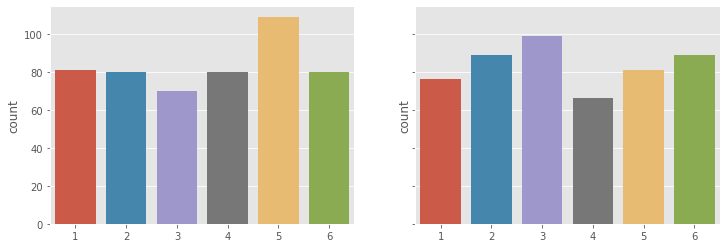

In [2]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 4))
sns.countplot(dice_1, ax=ax1)
sns.countplot(dice_2, ax=ax2)

Interesting. Looks like 500 rolls doesn't give us consistent results for our dice rolls. Die #1 rolled 5 significantly more times than die #2, among other identifiable differences.

Let's look at their sums.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


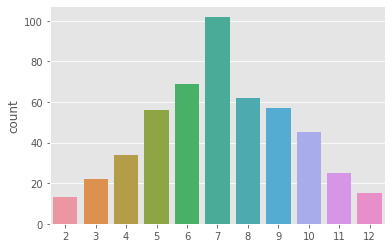

In [3]:
sns.countplot(sums)

## The Law of Large Numbers!

One of the reasons our results varied so greatly from what we expected is that we only ran the trial 500 times. 

Let's repeat the process but run this experiment 10,000 times.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


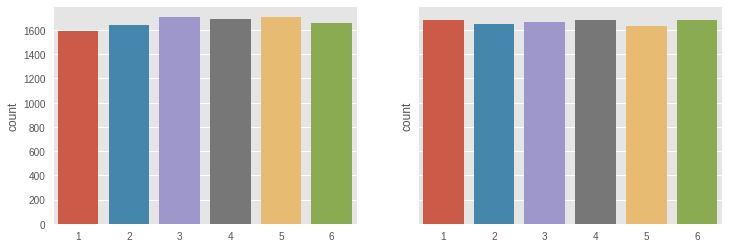

In [ ]:
np.random.seed(1738)

d1 = np.array([1, 2, 3, 4, 5, 6])
d2 = np.array([1, 2, 3, 4, 5, 6])

dice_1 = []
dice_2 = []
sums = []
for _ in range(10000):
    roll_1 = np.random.choice(d1)
    roll_2 = np.random.choice(d2)

    dice_1.append(roll_1)
    dice_2.append(roll_2)

    sums.append(roll_1 + roll_2)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 4))
sns.countplot(dice_1, ax=ax1)
sns.countplot(dice_2, ax=ax2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


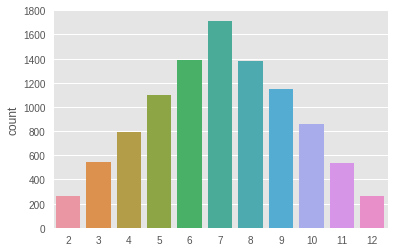

In [ ]:
sns.countplot(sums)

In [ ]:
outcomes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for n in sums:
  outcomes[n] += 1
  
percs = [f'{round((count/sum(outcomes))*100, 2)}%' for count in outcomes ]
percs

['0.0%',
 '0.0%',
 '2.64%',
 '5.47%',
 '7.94%',
 '11.01%',
 '13.86%',
 '17.14%',
 '13.82%',
 '11.49%',
 '8.63%',
 '5.33%',
 '2.67%',
 '0.0%']

In [ ]:
for i, val in enumerate(percs):
  print(f'{i}: {val}')

0: 0.0%
1: 0.0%
2: 2.64%
3: 5.47%
4: 7.94%
5: 11.01%
6: 13.86%
7: 17.14%
8: 13.82%
9: 11.49%
10: 8.63%
11: 5.33%
12: 2.67%
13: 0.0%


In [ ]:
same = 0
primes = 0
for i in range(len(dice_1)):
  if dice_1[i] == dice_2[i]:
    same += 1
  if sums[i] in prime_numbers:
    primes += 1

same_perc = same / len(dice_1)    
print(same_perc) # 16.66666
prime_perc = primes / len(dice_1)
print(prime_perc) # 41.59

0.1664
0.4159
